## Visualization of La Palma Earthquake Data

Using the subset of IGN data specific to La Palma. This subset was prepared using `screening.ipynb` and saved to `lapalma.csv`. Updates 30th Nov.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(style="whitegrid")

In [2]:
def make_category_columns(df):
    df['Depth'] = 'Shallow (<18km)'
    df.loc[(df['Depth(km)'] >= 18) & (df['Depth(km)'] <= 28), 'Depth'] = 'Interchange (18km>x>28km)'
    df.loc[df['Depth(km)'] >= 28, 'Depth'] = 'Deep (>28km)'
    return df

In [3]:
df = pd.read_csv('./lapalma.csv')
df['Time'] = df['UTC time']
df['Timestamp'] = pd.to_numeric(pd.to_datetime(df['Date'] + ' ' + df['Time']))
df = make_category_columns(df)
df.head()

Event        Date  UTC time Local time(*)  Latitude  Longitude  \
0  es2022chvdg  2022-02-02  17:31:41      17:31:41   28.6224   -17.9208   
1  es2022chfbg  2022-02-02  09:24:25      09:24:25   28.5381   -17.8586   
2  es2022cffbs  2022-02-01  07:10:21      07:10:21   28.5515   -17.8468   
3  es2022cfagc  2022-02-01  04:42:34      04:42:34   28.5655   -17.8853   
4  es2022cewue  2022-02-01  02:57:48      02:57:48   28.5866   -17.9535   

   Depth(km)  Magnitude Mag. type Max. int                          Region  \
0        0.0        1.7      mbLg      NaN                SE TAZACORTE.ILP   
1       34.0        2.2      mbLg      NaN  N FUENCALIENTE DE LA PALMA.ILP   
2       11.0        1.6      mbLg      NaN  N FUENCALIENTE DE LA PALMA.ILP   
3        9.0        2.2      mbLg      NaN  NW FUENCALIENTE DE LA PALMA.IL   
4        8.0        1.8      mbLg      NaN                SW TAZACORTE.ILP   

   More Info      Time            Timestamp            Depth  
0        NaN  17:31:41  1643823101000000000  Shallow (<18km)  
1        NaN  09:24:25  1643793865000000000     Deep (>28km)  
2        NaN  07:10:21  1643699421000000000  Shallow (<18km)  
3        NaN  04:42:34  1643690554000000000  Shallow (<18km)  
4        NaN  02:57:48  1643684268000000000  Shallow (<18km)

In [7]:
def cumulative_events_mag_depth(df, hue='Depth', kind='scatter', ax=None, dpi=300, palette=None):
    g = sns.jointplot(x="Magnitude", y="Depth(km)", data=df,
                      kind=kind, hue=hue, color="m", height=10, 
                      hue_order=['Shallow (<18km)', 'Interchange (18km>x>28km)', 'Deep (>28km)'], ax=ax, palette=palette, ylim=(-2,50), xlim=(0.3,5.6))
    g.plot_joint(sns.kdeplot, color="b", zorder=1, levels=15, ax=ax)
    g.fig.axes[0].invert_yaxis();
    g.fig.set_dpi(dpi)

    
def cumulative_events_spatial(df, hue='Depth', kind='scatter', ax=None, dpi=300, palette=None):
    g = sns.jointplot(x="Longitude", y="Depth(km)", data=df,
                      kind=kind, hue=hue, color="m", height=10, palette=palette,
                      hue_order=['Shallow (<18km)', 'Interchange (18km>x>28km)',  'Deep (>28km)', ], ax=ax, ylim=(-2,50))
    g.plot_joint(sns.kdeplot, color="b", zorder=1, levels=15, ax=ax)
    g.fig.axes[0].invert_yaxis();

/opt/homebrew/Caskroom/miniforge/base/envs/lapalma-earthquakes/lib/python3.10/site-packages/seaborn/distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


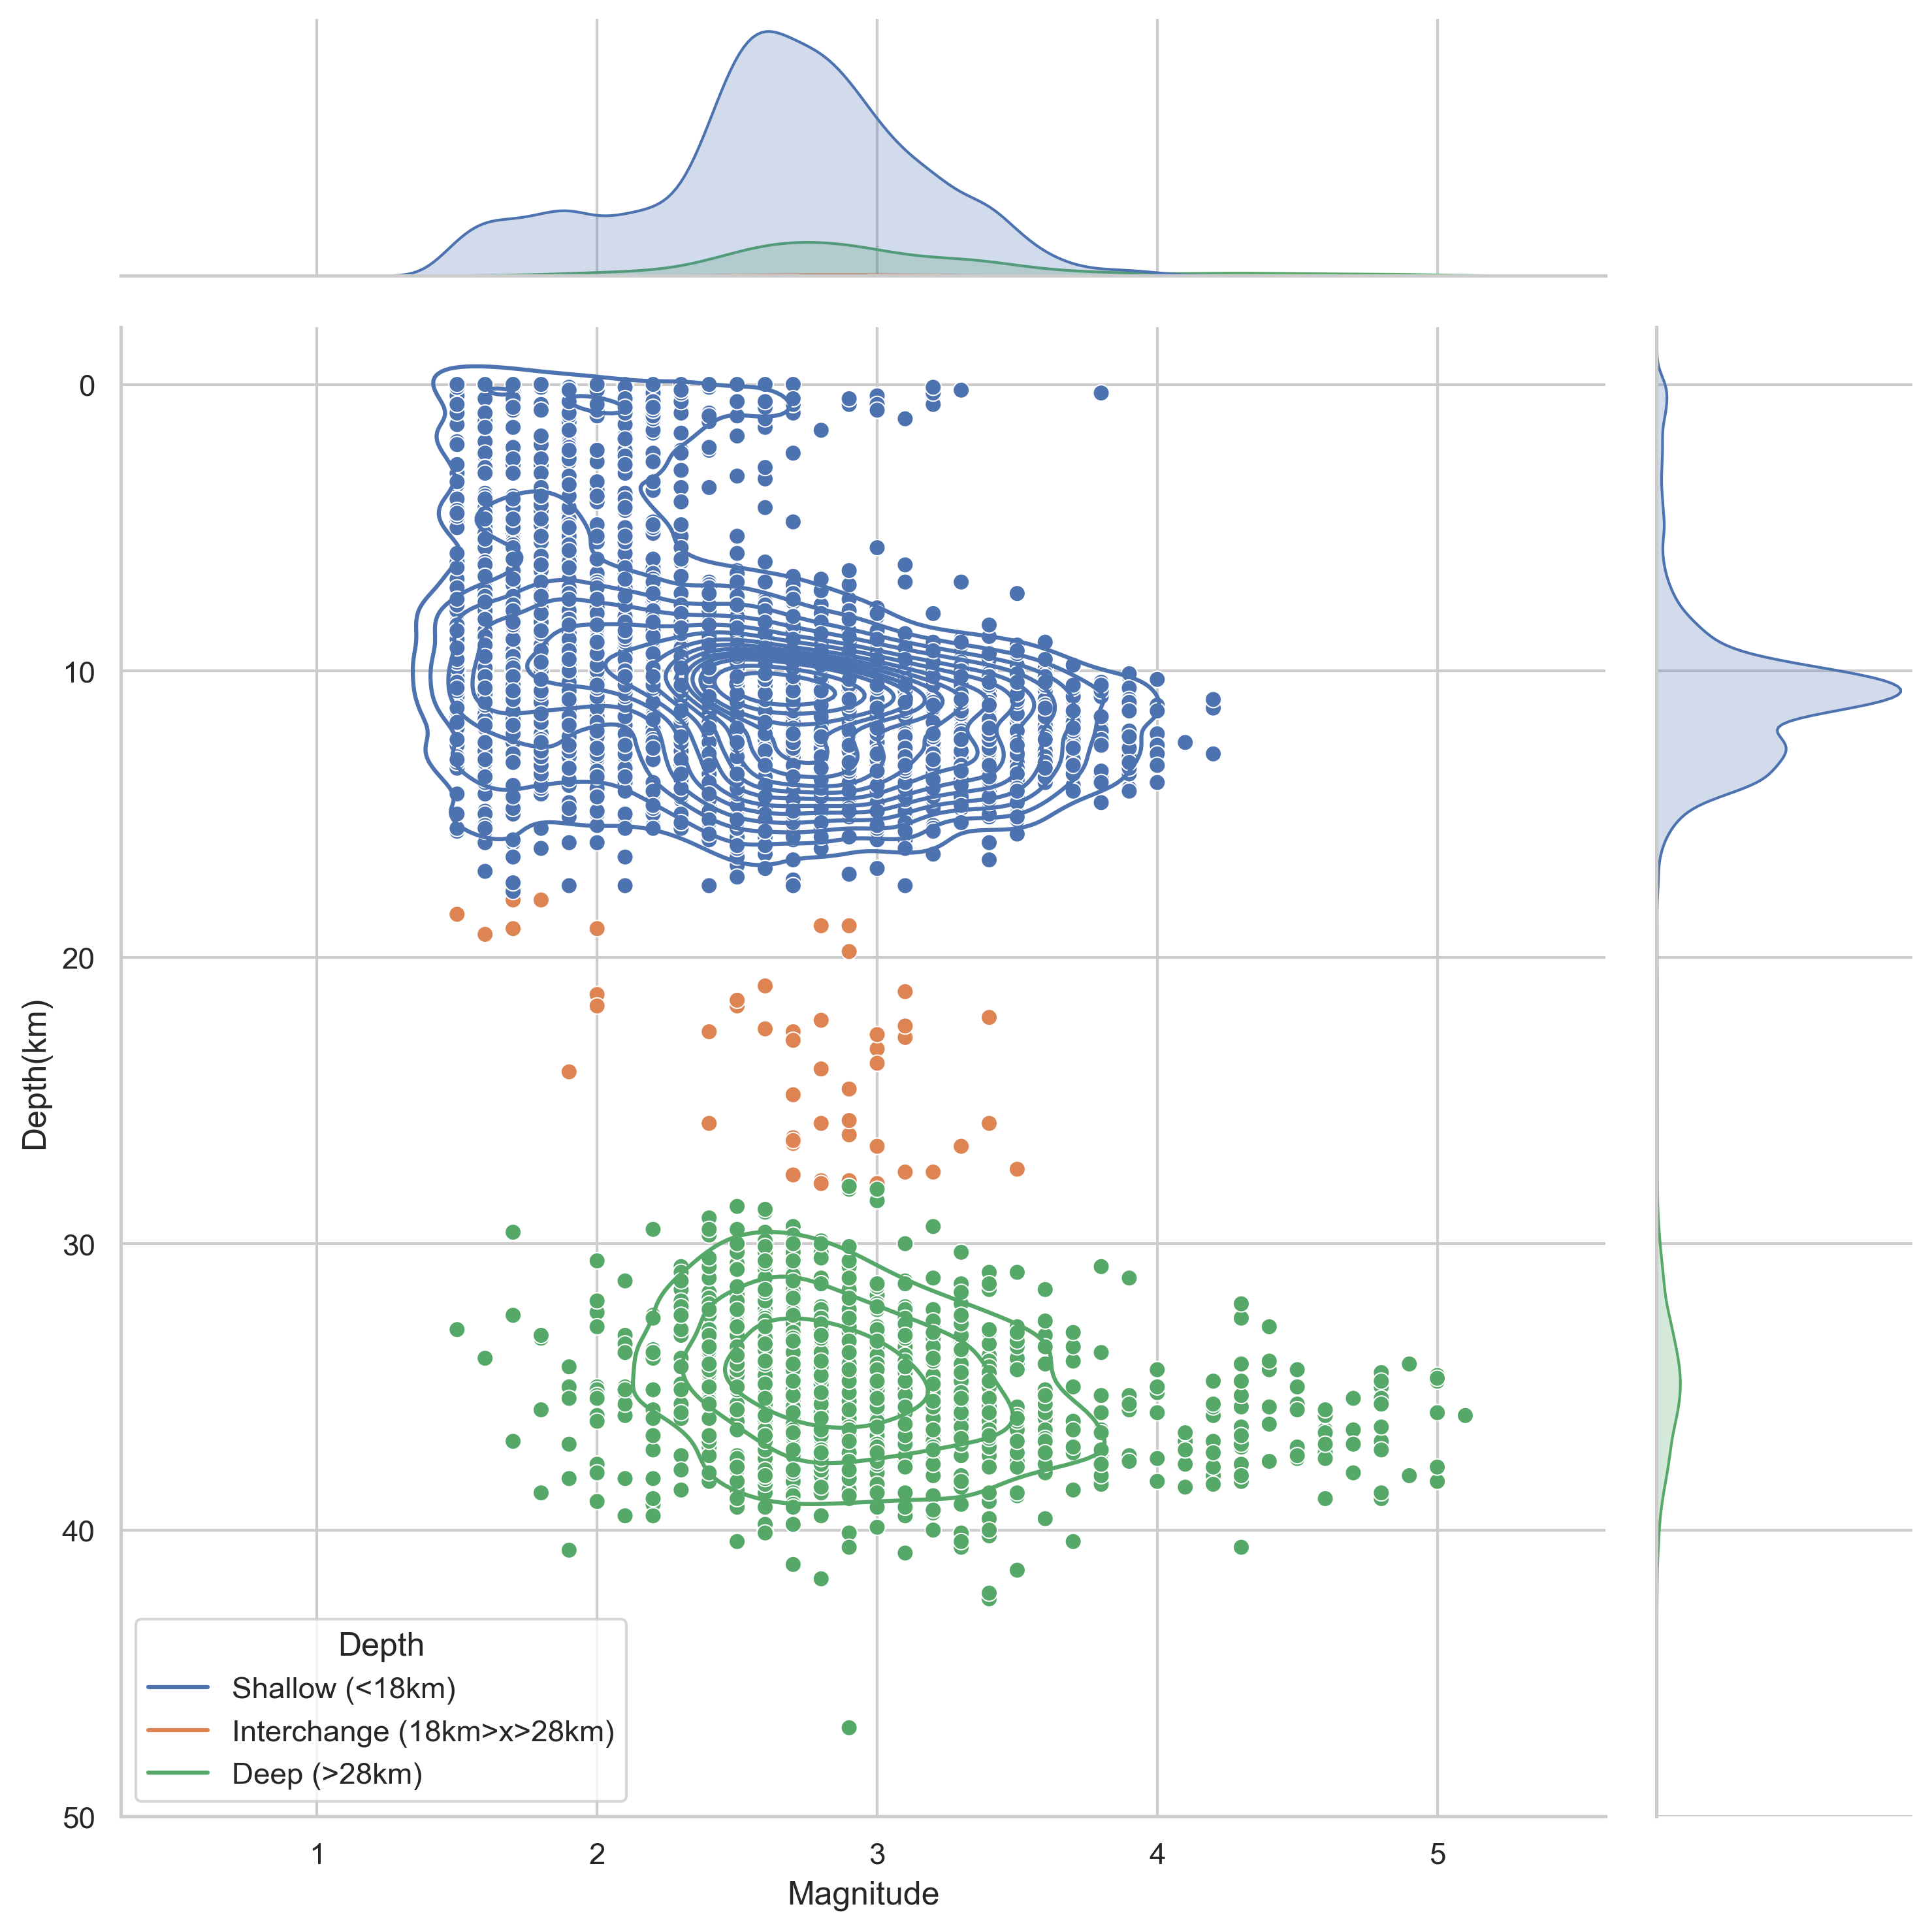

In [8]:
cumulative_events_mag_depth(df)

/opt/homebrew/Caskroom/miniforge/base/envs/lapalma-earthquakes/lib/python3.10/site-packages/seaborn/distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


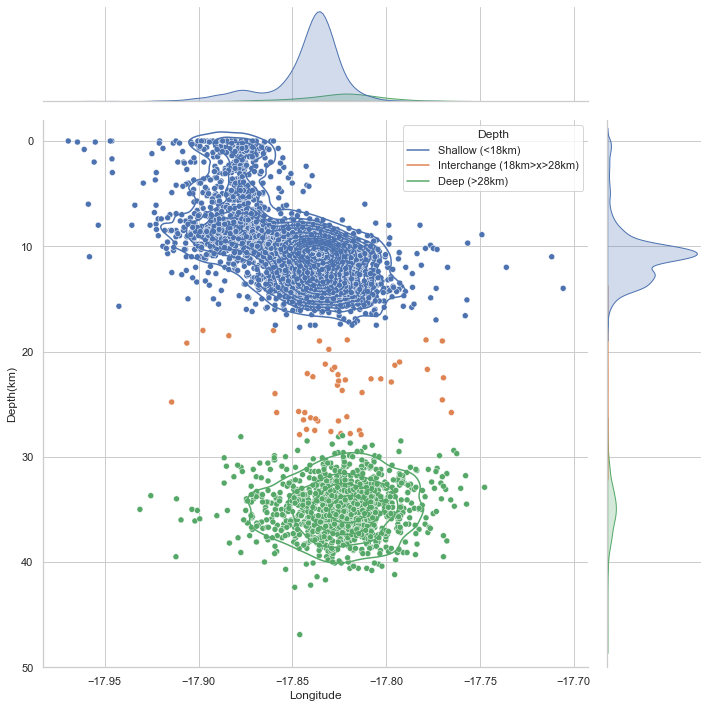

In [9]:
cumulative_events_spatial(df)

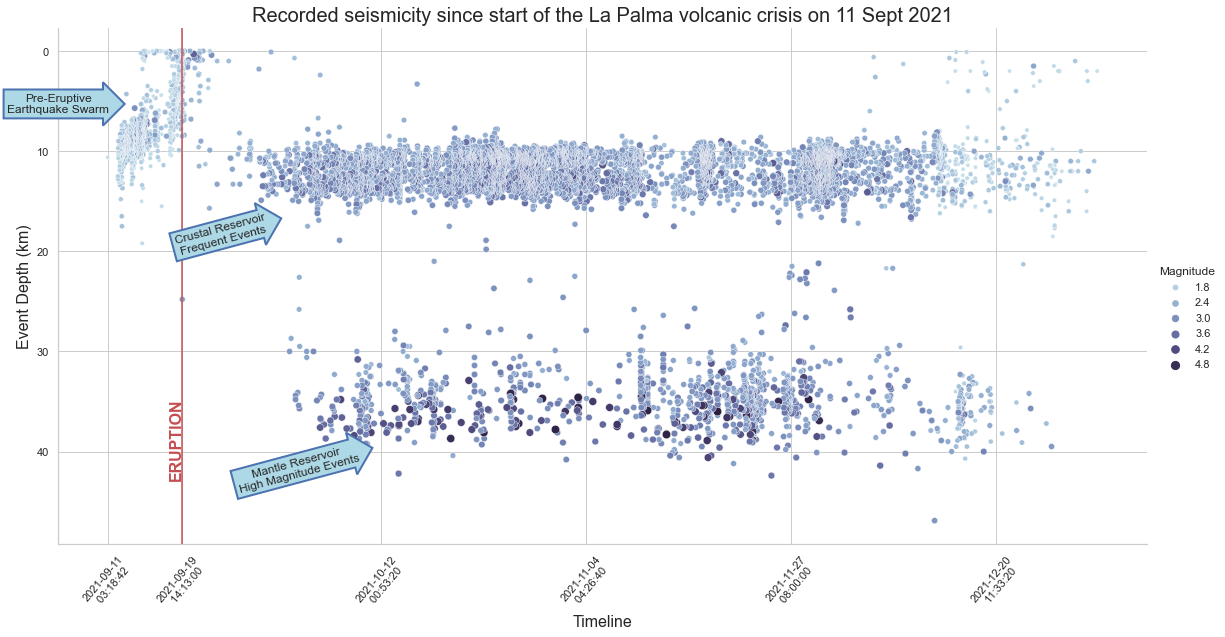

In [10]:
def get_numeric_datetime(dt: str):
    return pd.to_numeric(pd.to_datetime([dt]))[0]

sns.relplot(
    data=df[df['Date'] < '2022-01-01'],
    x="Timestamp", y="Depth(km)",
    hue="Magnitude", size="Magnitude", 
    kind="scatter",palette=sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True),
    height=8, aspect=2
)
plt.gca().invert_yaxis()
xticks = plt.gca().get_xticks()
new_xticks = [get_numeric_datetime('2021-09-11 03:18:42'),
    get_numeric_datetime('2021-09-19 14:13:00')]
new_xticks = np.append(new_xticks, xticks[2:-1])
# new_xticks = np.append(new_xticks, [get_numeric_datetime('2021-11-9 16:00:00')])

plt.gca().set_xticks(new_xticks)
xtick_labels = [pd.to_datetime(tm).strftime('%Y-%m-%d\n %H:%M:%S') for tm in new_xticks]
plt.gca().set_xticklabels(xtick_labels, rotation=50)



plt.title('Recorded seismicity since start of the La Palma volcanic crisis on 11 Sept 2021', fontdict=dict(fontsize=20))
plt.xlabel('Timeline', fontsize=16)
plt.ylabel('Event Depth (km)', fontsize=16);


plt.axvline(x=new_xticks[1], ymin=0, color='r')
plt.annotate('ERUPTION', (0.102, 0.13), rotation=90, xycoords='axes fraction', fontweight='bold', fontsize=16, color='r')
plt.annotate("Pre-Eruptive\nEarthquake Swarm", (0.0, 0.835), xycoords='axes fraction', horizontalalignment="center", bbox=dict(boxstyle="rarrow,pad=0.3", fc="lightblue", ec="b", lw=2))
plt.annotate("Crustal Reservoir\nFrequent Events", (0.15, 0.56), rotation=15, xycoords='axes fraction', horizontalalignment="center", bbox=dict(boxstyle="rarrow,pad=0.3", fc="lightblue", ec="b", lw=2))
plt.annotate("Mantle Reservoir\nHigh Magnitude Events", (0.22, 0.1), rotation=15, xycoords='axes fraction', horizontalalignment="center", bbox=dict(boxstyle="rarrow,pad=0.3", fc="lightblue", ec="b", lw=2));



## Visualising Long term earthquake data

Data taken directly from the IGN Catalog

In [11]:
df_ign = pd.read_csv('./lapalma_ign.csv')
df_ign = make_category_columns(df_ign)
df_ign.head()

Event        Date      Time  Latitude  Longitude  Depth(km)  \
0   es2017eugju  2017-03-09  23:44:06   28.5346   -17.8349       26.0   
1   es2017euhlh  2017-03-10  00:16:10   28.5491   -17.8459       27.0   
2   es2017cpaoh  2017-03-10  00:16:11   28.5008   -17.8863       20.0   
3   es2017eunnk  2017-03-10  03:20:26   28.5204   -17.8657       30.0   
4   es2017kajei  2017-08-21  02:06:55   28.5985   -17.7156        0.0   

      Intensity  Magnitude  Type Mag                        Location  \
0                      1.6         4  NE FUENCALIENTE DE LA PALMA.IL   
1                      2.0         4  N FUENCALIENTE DE LA PALMA.ILP   
2                      2.1         4              W LOS CANARIOS.ILP   
3                      1.6         4  NW FUENCALIENTE DE LA PALMA.IL   
4                      1.6         4                 E EL PUEBLO.ILP   

             Timestamp             DateTime  Swarm  Phase  \
0  1504482246000000000  2017-03-09 23:44:06    0.0      0   
1  1506989770000000000  2017-03-10 00:16:10    0.0      0   
2  1506989771000000000  2017-03-10 00:16:11    0.0      0   
3  1507000826000000000  2017-03-10 03:20:26    0.0      0   
4  1503281215000000000  2017-08-21 02:06:55    0.0      0   

                       Depth  
0  Interchange (18km>x>28km)  
1  Interchange (18km>x>28km)  
2  Interchange (18km>x>28km)  
3               Deep (>28km)  
4            Shallow (<18km)

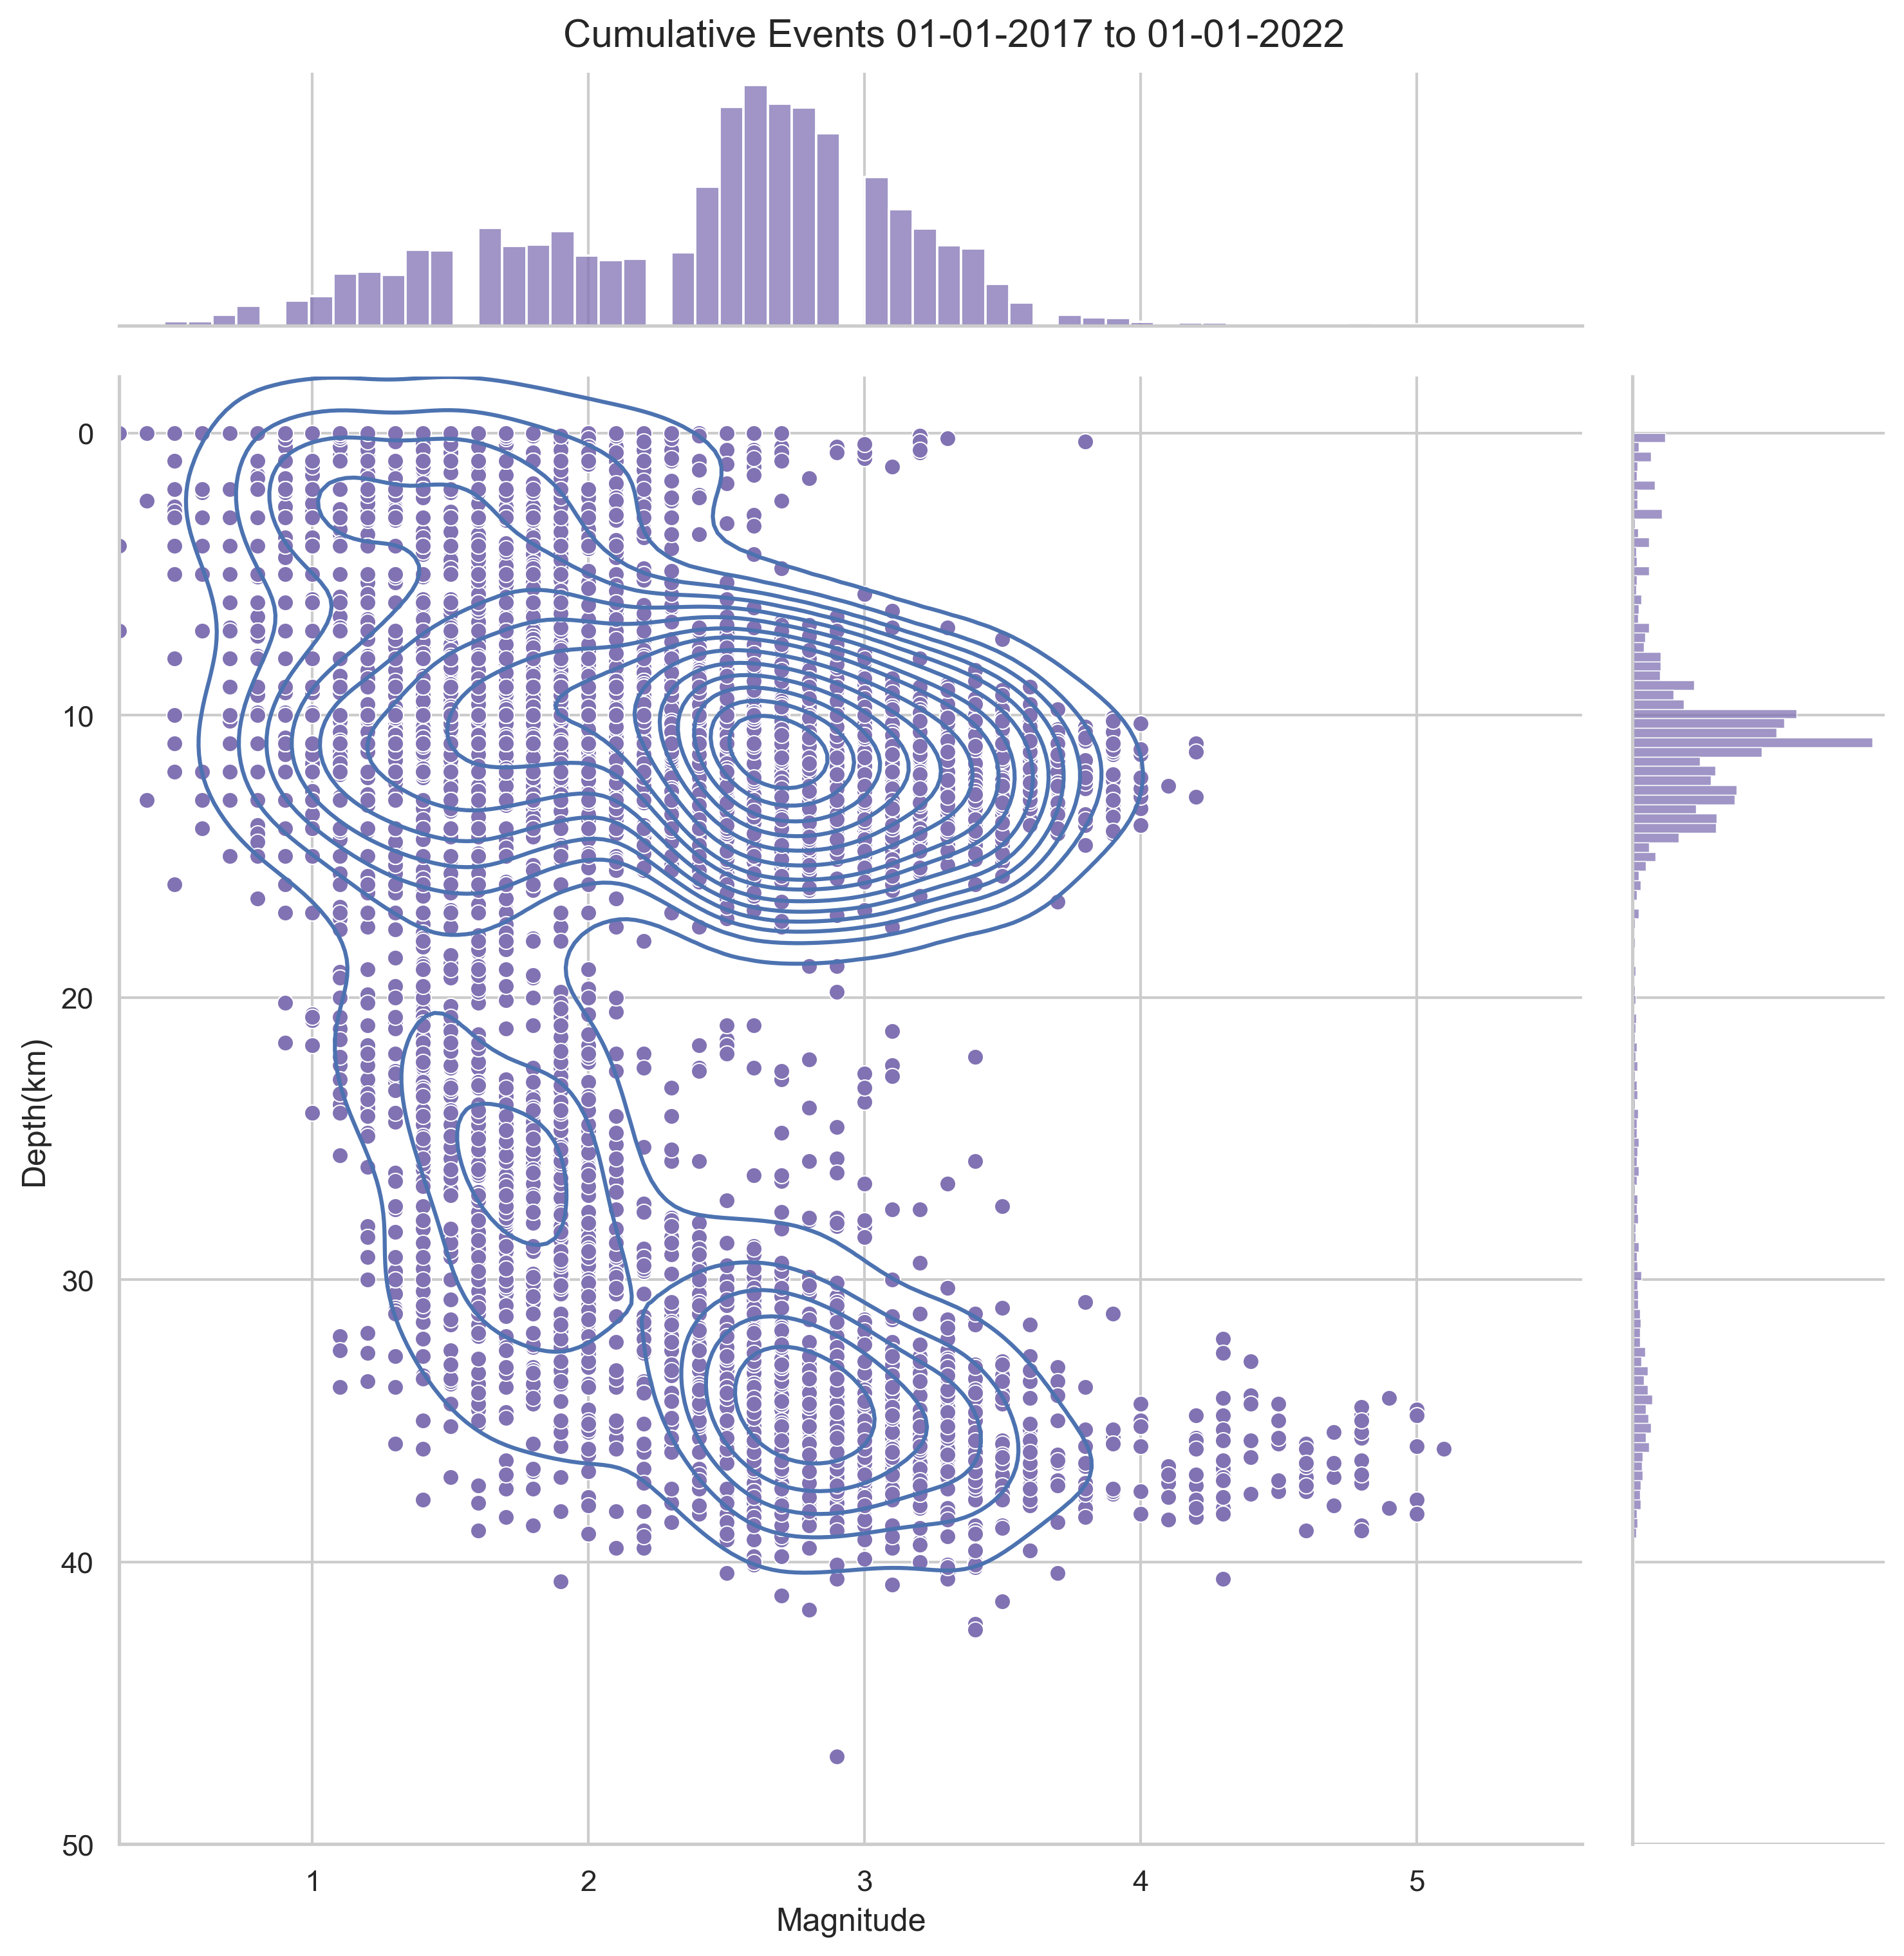

In [12]:
cumulative_events_mag_depth(df_ign, hue=None)
plt.suptitle('Cumulative Events 01-01-2017 to 01-01-2022', y=1.01);

In [13]:
df_ign_early = df_ign[df_ign['Date'] < '2021-09-11']
df_ign_pre = df_ign[(df_ign['Date'] >= '2021-09-11')&(df_ign['Date'] < '2021-09-19')]
df_ign_phase1 = df_ign[(df_ign['Date'] >= '2021-09-11')&(df_ign['Date'] < '2021-10-01')]
df_ign_phase2 = df_ign[(df_ign['Date'] >= '2021-10-01')&(df_ign['Date'] < '2021-12-01')]
df_ign_phase3 = df_ign[(df_ign['Date'] >= '2021-12-01')&(df_ign['Date'] <= '2021-12-31')]

In [14]:
cumulative_events_mag_depth(df_ign_early, hue=None)
plt.suptitle(f'({len(df_ign_early.index)})  Events prior to 2021-09-11', y=1.01)

Text(0.5, 1.01, '(785)  Events prior to 2021-09-11')

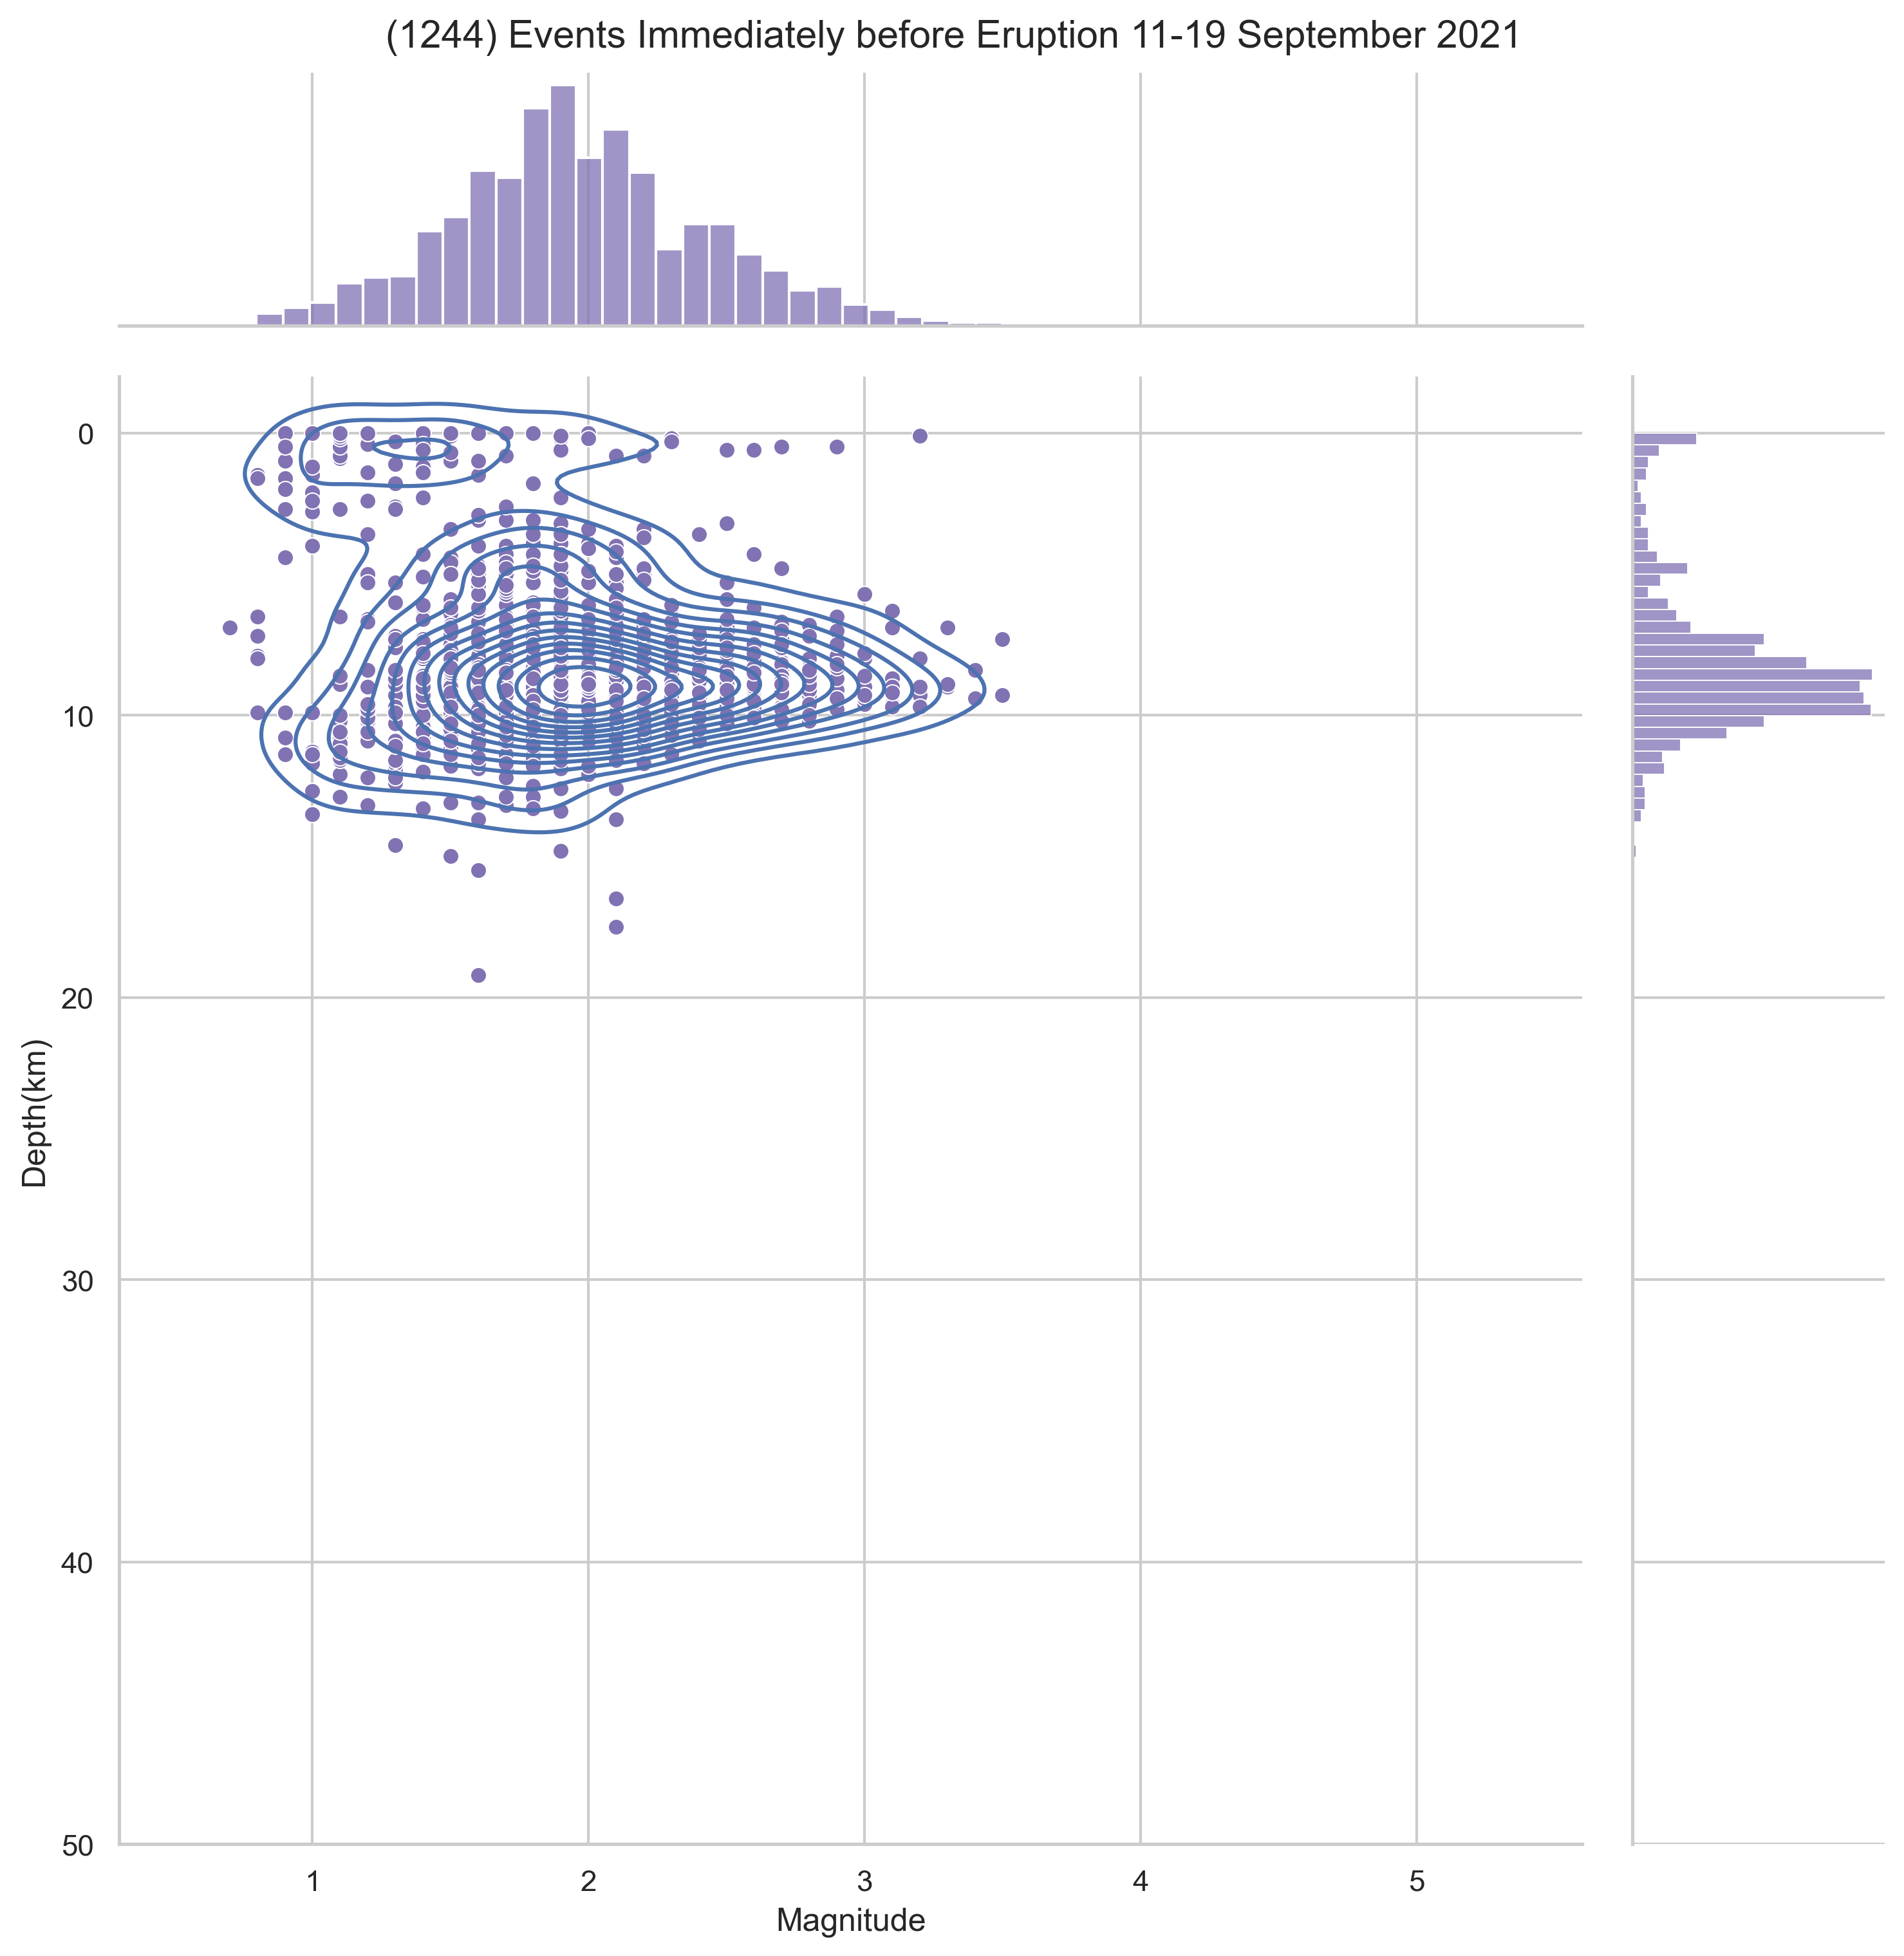

In [15]:
cumulative_events_mag_depth(df_ign_pre, hue=None)
plt.suptitle(f"({len(df_ign_pre.index)}) Events Immediately before Eruption 11-19 September 2021", y=1.01);

In [16]:
cumulative_events_mag_depth(df_ign_phase1, hue=None)
plt.suptitle(f"({len(df_ign_phase1.index)}) Events in Phase 1 of Eruption 2021-09-11 to 2021-09-30", y=1.01);

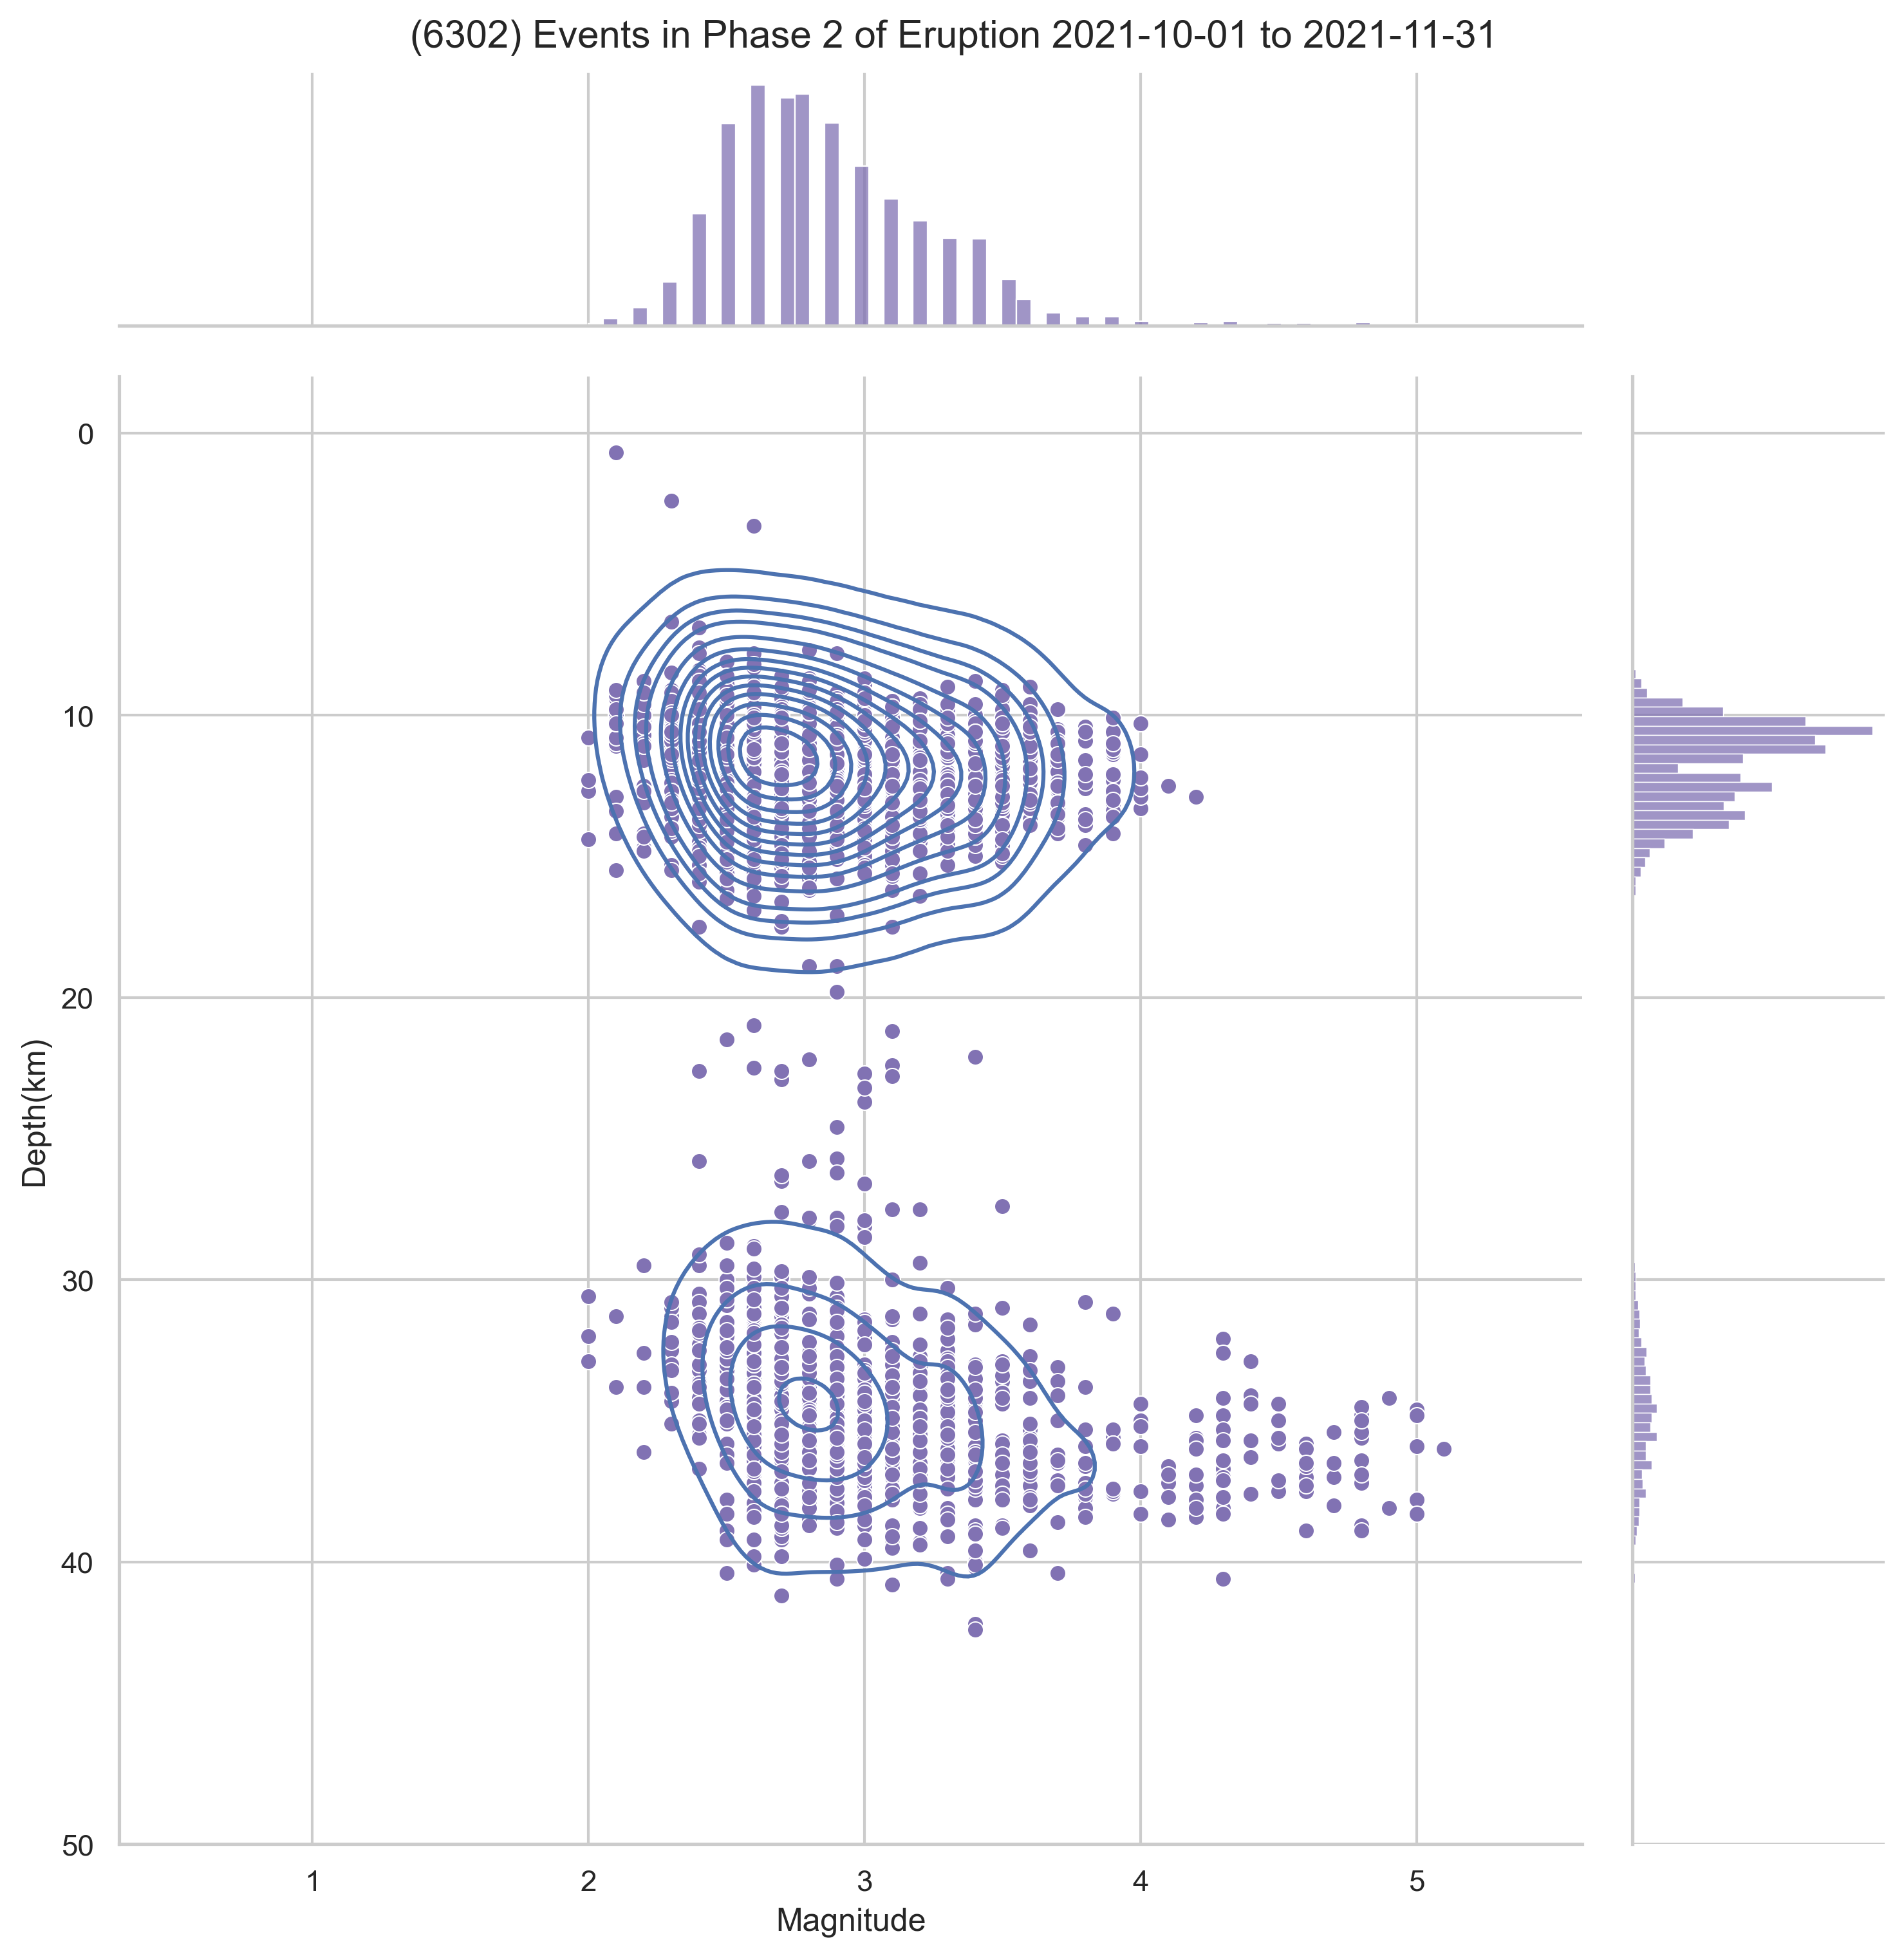

In [17]:
cumulative_events_mag_depth(df_ign_phase2, hue=None)
plt.suptitle(f"({len(df_ign_phase2.index)}) Events in Phase 2 of Eruption 2021-10-01 to 2021-11-31", y=1.01);

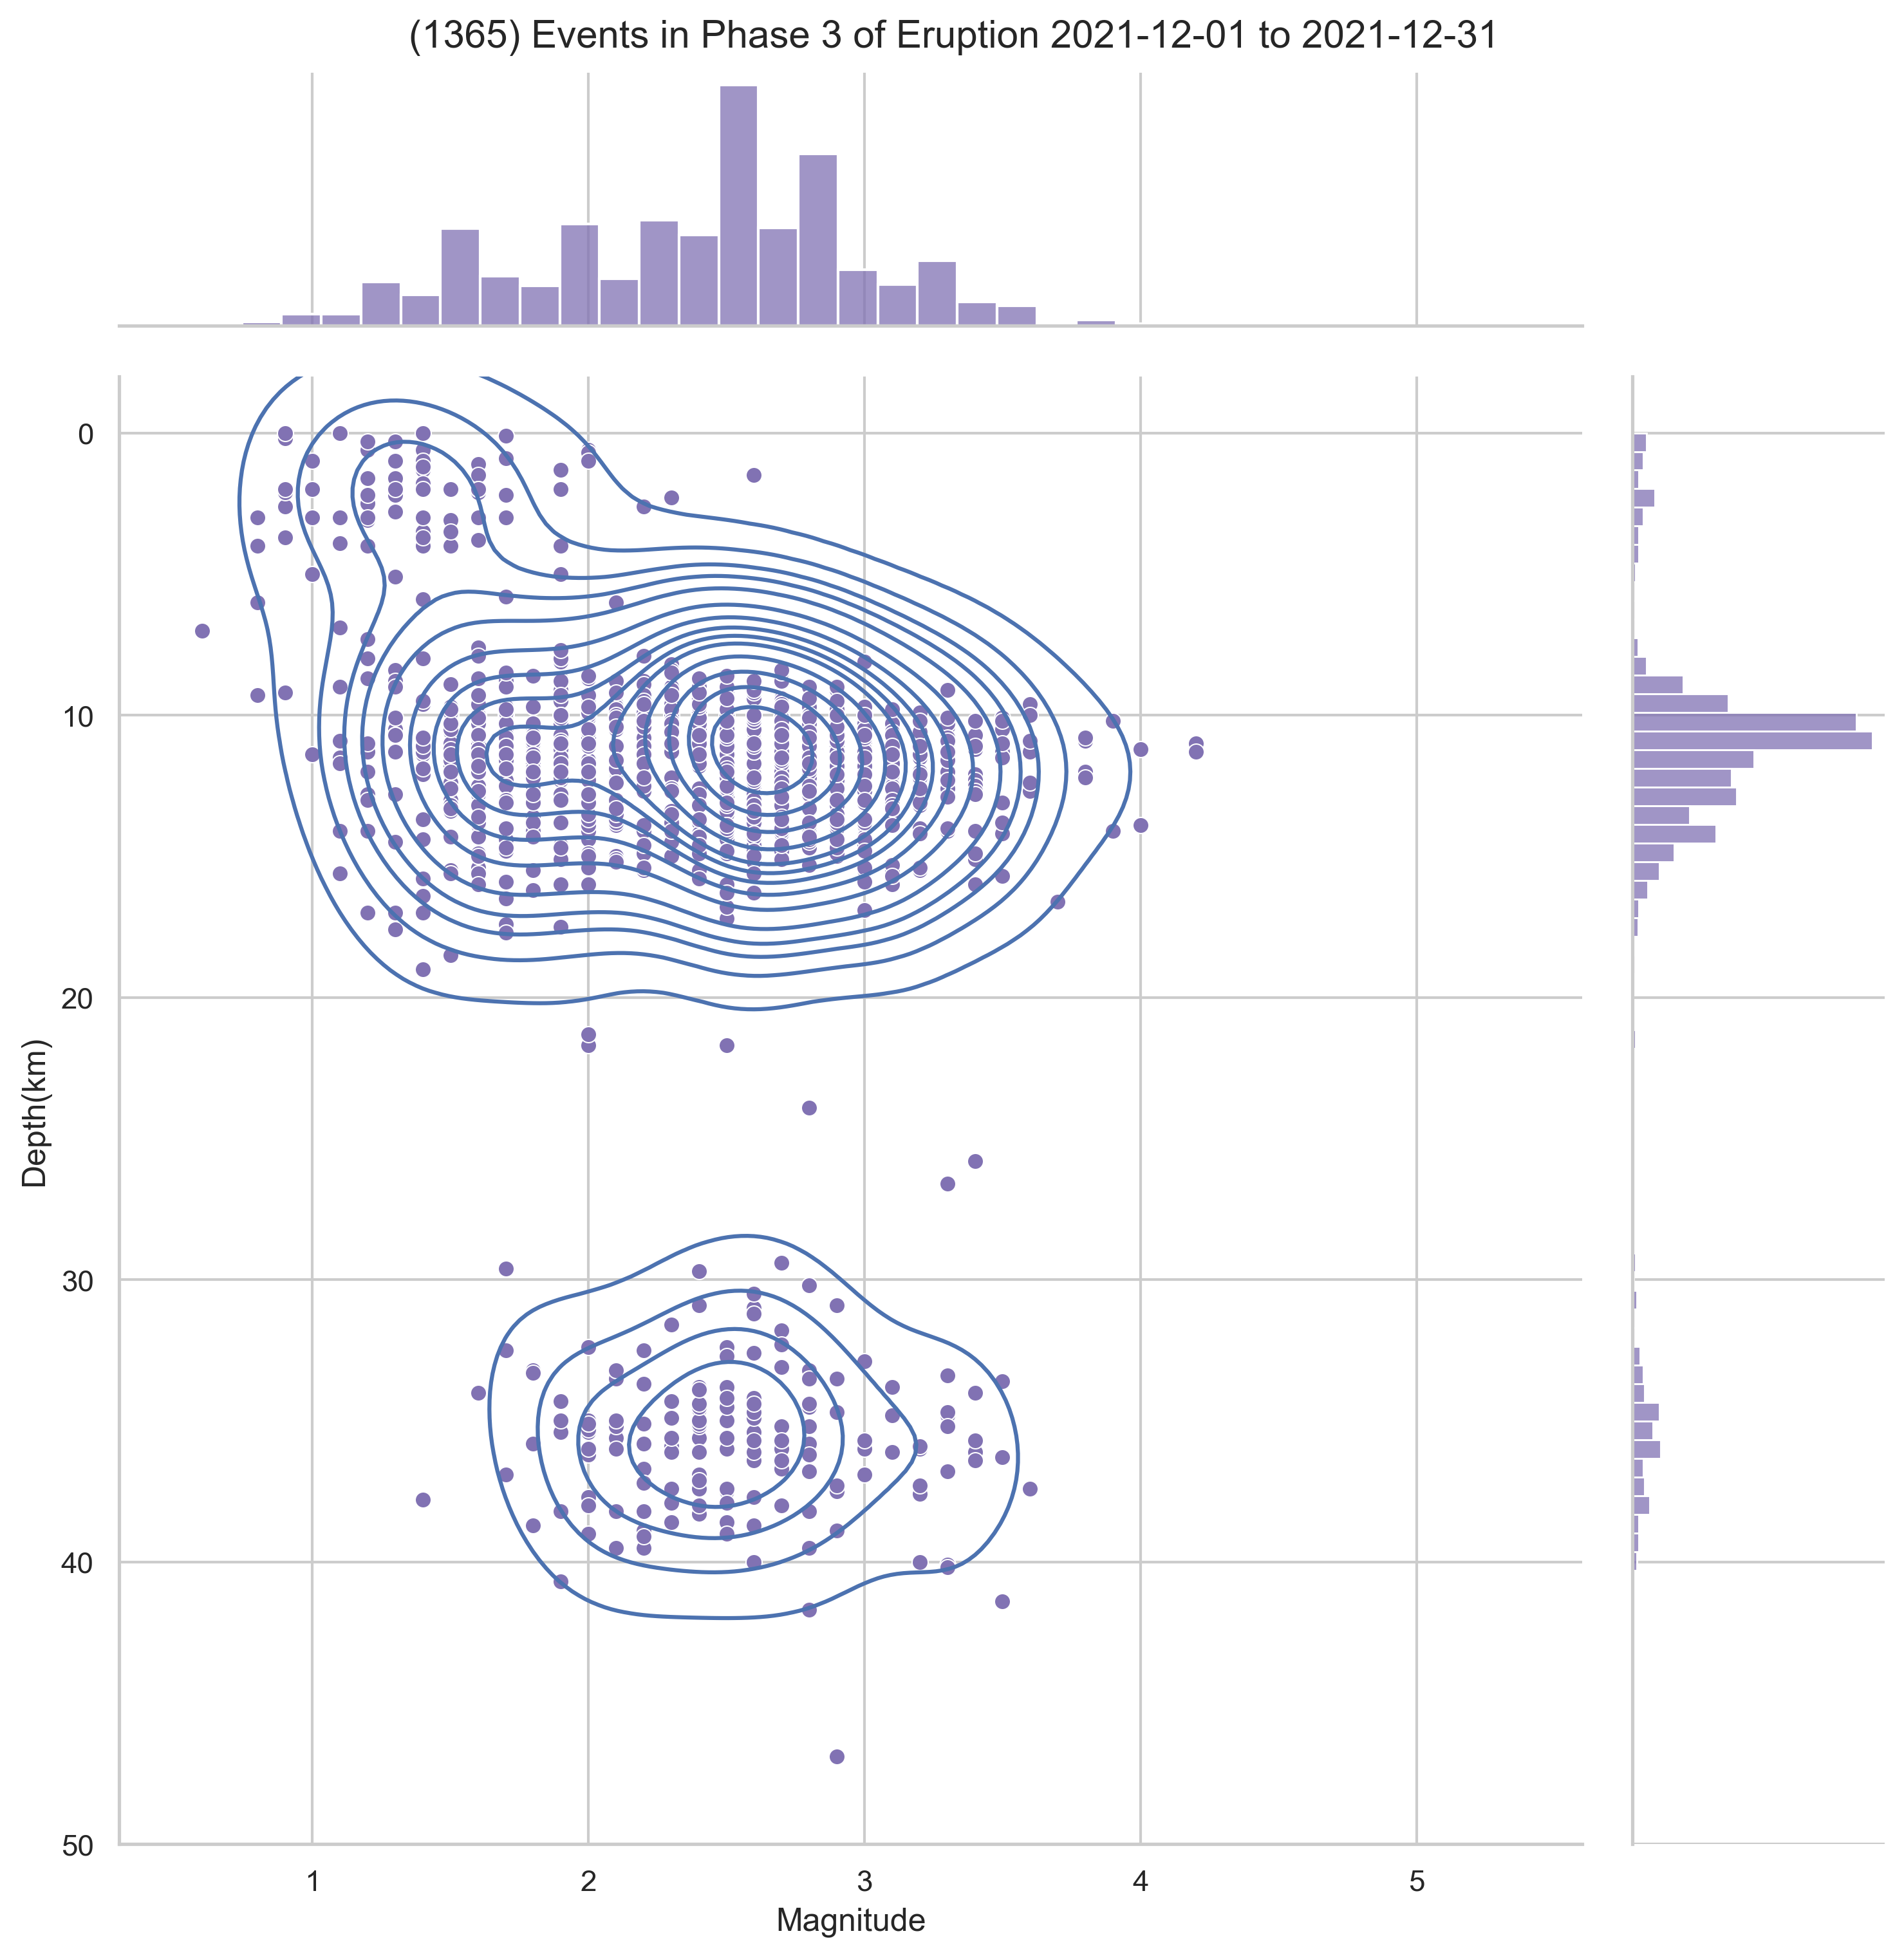

In [18]:
cumulative_events_mag_depth(df_ign_phase3, hue=None)
plt.suptitle(f"({len(df_ign_phase3.index)}) Events in Phase 3 of Eruption 2021-12-01 to 2021-12-31", y=1.01);

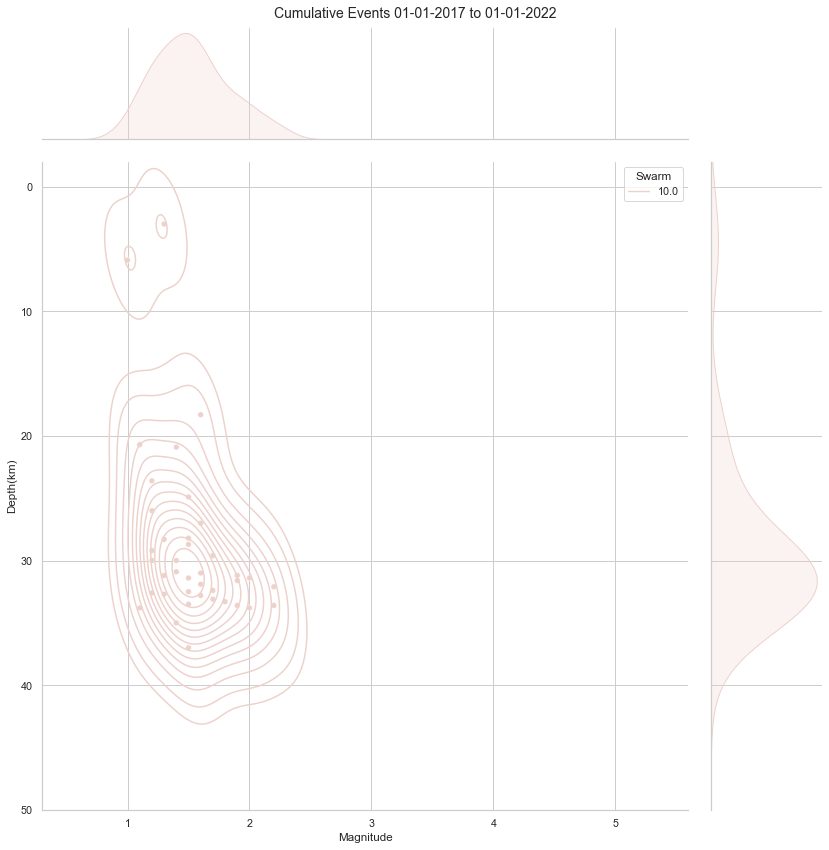

In [58]:
def cumulative_events_mag_depth(df, hue='Depth', kind='scatter', ax=None, dpi=300, palette=None):
    g = sns.jointplot(x="Magnitude", y="Depth(km)", data=df,
                      kind=kind, hue=hue, height=12, 
                      hue_order=['Shallow (<18km)', 'Interchange (18km>x>28km)', 'Deep (>28km)'], 
                      ax=ax, palette=palette, ylim=(-2,50), xlim=(0.3,5.6), dropna=True)
    g.plot_joint(sns.kdeplot, color="b", zorder=1, levels=15, ax=ax)
    g.fig.axes[0].invert_yaxis();
    g.fig.set_dpi(dpi)

cumulative_events_mag_depth(df_ign[df_ign['Swarm'] == 10], hue='Swarm', kind='scatter', dpi=70)
plt.suptitle('Cumulative Events 01-01-2017 to 01-01-2022', y=1.01);